In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## This project bases on simple operations on data regarding gross average salaries in Croatia grouped by specific branches. 

## The dataset was published by Croatian Bureau of Statistics 

## https://www.dzs.hr/default_e.htm 

## Dataset's link: https://www.dzs.hr/Hrv_Eng/Pokazatelji/Zaposlenost%20i%20place/Place.xlsx

In [2]:
# Function for preparing a dataframe

def createDf(sheet_name):
    df = pd.read_excel(xlsx, sheet_name=sheet_name, skiprows=5, usecols=range(4,100))
    df.rename(columns={'Unnamed: 4' : 'Branch'}, inplace=True)
    df.set_index('Branch', inplace=True)
    df.replace('-', np.nan, inplace=True)
    df.dropna(inplace=True)
    return df

In [3]:

# Variable for the file object

xlsx = pd.ExcelFile("~/Downloads/Place.xlsx")



### Data cleaning

# XLSX sheet 1:

df_net = createDf('9.3.1.')

# XLSX sheet 2:

df_gross = createDf('9.3.3.')
#df3 = df3[~df3.index.duplicated(keep='first')]
df_gross = df_gross[~df_gross.index.duplicated(keep='first')]

In [4]:
# Function for creating a bar graph

def barGraph(x_label, y_label, legend=False):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x_label, y_label)
    if legend:
        ax.legend(legend)
    plt.show()

## Annual salaries (2015 - 2020)

In [5]:
# Branches of this research

print("\nThe studied branches:\n\n")
#count = 0
for count, item in enumerate(df_gross.index):
    #count += 1
    print(f"{count + 1}. {item}")


The studied branches:


1. Total
2. Agriculture, forestry and fishing
3. Crop and animal production, hunting and related service activities
4. Forestry and logging
5. Fishing and aquaculture
6. Mining and quarrying
7. Extraction of crude petroleum and natural gas
8. Other mining and quarrying
9. Mining support service activities
10. Manufacturing
11. Manufacture of food products
12. Manufacture of beverages
13. Manufacture of tobacco products
14. Manufacture of textiles
15. Manufacture of wearing apparel
16. Manufacture of leather and related products
17. Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials
18. Manufacture of paper and paper products
19. Printing and reproduction of recorded media
20. Manufacture of coke and refined petroleum products
21. Manufacture of chemicals and chemical products
22. Manufacture of basic pharmaceutical products and  pharmaceutical preparations
23. Manufacture of rubber and

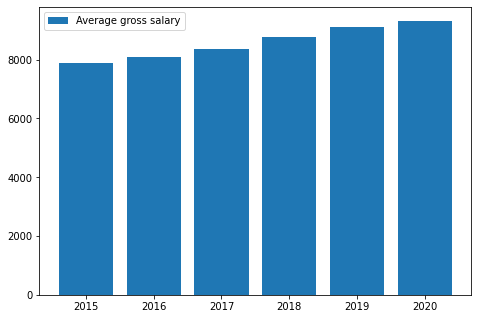

In [6]:
# Additional dataframe consisiting of annual data: 2015-2020

df_2015_2020_gross = df_gross[['Ø 2015.', 'Ø 2016.', 'Ø 2017.', 'Ø 2018.', 'Ø 2019.', 'Ø 2020.']].copy()
df_2015_2020_gross.columns=['2015', '2016', '2017', '2018', '2019', '2020']
total = df_2015_2020_gross.iloc[0]
df_2015_2020_gross.drop(['Total'], axis=0, inplace=True)


# Adjusted mean salaries - mean of all branches calculated by usining the Pandas library function:

mean_s1 = df_2015_2020_gross.mean()
mean_df_gross = mean_s1.to_frame().T


# Bar graph

barGraph(mean_df_gross.columns, mean_df_gross.iloc[0], legend=['Average gross salary'])

In [7]:
mean_df_gross.index = ['Mean']
mean_df_gross

,2015,2016,2017,2018,2019,2020
Mean,7875.397959,8081.55102,8348.918367,8776.918367,9102.408163,9329.153061


### Min/Max & Range

#### Maximal salaries

In [8]:
max_df = df_2015_2020_gross.max().to_frame()
max_df.columns = ['max']
max_df

,max
2015,15219.0
2016,15751.0
2017,15378.0
2018,15745.0
2019,16638.0
2020,16397.0


#### Minimal salaries

In [9]:
min_df = df_2015_2020_gross.min().to_frame()
min_df.columns = ['min']
min_df

,min
2015,4077.0
2016,4223.0
2017,4482.0
2018,4954.0
2019,5388.0
2020,5683.0


In [10]:
min_max = max_df.join(min_df)
min_max

,max,min
2015,15219.0,4077.0
2016,15751.0,4223.0
2017,15378.0,4482.0
2018,15745.0,4954.0
2019,16638.0,5388.0
2020,16397.0,5683.0


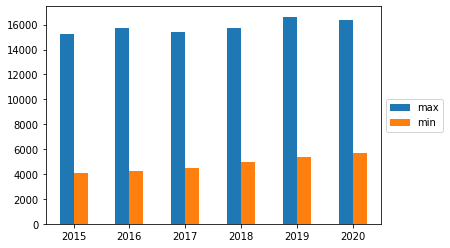

In [11]:
ax = min_max.plot.bar(rot=0)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### Sectors with maximal salaries (2015 - 2020)

In [12]:
s_index = df_2015_2020_gross.idxmax(axis=0)
s_max = df_2015_2020_gross.max()
index_df = pd.DataFrame(s_index)
index_df.columns = ['Sector']
df_max = pd.DataFrame(s_max)
df_max.columns = ['Salaries']
index_df.join(df_max)

,Sector,Salaries
2015,Air transport,15219.0
2016,Manufacture of coke and refined petroleum prod...,15751.0
2017,Air transport,15378.0
2018,Air transport,15745.0
2019,Air transport,16638.0
2020,Manufacture of coke and refined petroleum prod...,16397.0


#### Sectors with minimal salaries (2015 - 2020)

In [13]:
s_index = df_2015_2020_gross.idxmin(axis=0)
s_min = df_2015_2020_gross.min()
index_df = pd.DataFrame(s_index)
index_df.columns = ['Sector']
df_min = pd.DataFrame(s_min)
df_min.columns = ['Salaries']
index_df.join(df_min)

,Sector,Salaries
2015,Manufacture of wearing apparel,4077.0
2016,Manufacture of wearing apparel,4223.0
2017,Manufacture of wearing apparel,4482.0
2018,Manufacture of leather and related products,4954.0
2019,Manufacture of leather and related products,5388.0
2020,Security and investigation activities,5683.0


In [14]:
df_range = df_2015_2020_gross.max().to_frame() - df_2015_2020_gross.min().to_frame()
df_range.columns = ['Range']
df_range

,Range
2015,11142.0
2016,11528.0
2017,10896.0
2018,10791.0
2019,11250.0
2020,10714.0


### Quartiles

In [15]:
q_buildin = df_2015_2020_gross.quantile([0.25, 0.5, 0.75], interpolation='higher')
q_buildin.index = ['Q1: 25%', 'Median: 50%', 'Q3: 75%']
q_buildin

,2015,2016,2017,2018,2019,2020
Q1: 25%,6397.0,6454.0,6716.0,7282.0,7549.0,7603.0
Median: 50%,7519.0,7690.0,7885.0,8211.0,8564.0,8571.0
Q3: 75%,8988.0,9129.0,9447.0,9900.0,10229.0,10533.0


#### Counting manually

#### Lower Quartile

In [35]:

q1 = 0.25 * len(df_2015_2020_gross)

q1 = df_2015_2020_gross.iloc[math.floor(q1-1)] + (0.75 * (df_2015_2020_gross.iloc[math.floor(q1)] - df_2015_2020_gross.iloc[math.floor(q1-1)]))
q1 = q1.to_frame()
q1.columns = ['Q1']
q1

,Q1
2015,6401.500
2016,6584.750
2017,6991.250
2018,7401.750
2019,7648.750
2020,7941.250


In [20]:
#The outcomes of build-in Pandas/Numpy functions and "manual" counting, 
#just as the ways of counting quartiles, differ from each other

### Variance and Standard Deviation

#### Pandas build-in functions:

In [21]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [22]:
var1 = df_2015_2020_gross.var().to_frame()
var1.columns=['Variance']
var1

,Variance
2015,5804913.355
2016,6466715.198
2017,5961012.261
2018,5970224.014
2019,6416909.667
2020,6375631.224


In [23]:
std1 = df_2015_2020_gross.std().to_frame()
std1.columns=['Standard Deviation']
std1

,Standard Deviation
2015,2409.339
2016,2542.974
2017,2441.518
2018,2443.404
2019,2533.162
2020,2525.001


#### Manually, using the formulas
#### Assumption: collected data is the sample

### Variance

In [24]:
#Simple for loop for data from 2015
difference = 0
for item in df_2015_2020_gross['2015']:
    difference += (item - df_2015_2020_gross['2015'].mean()) ** 2
s_squared = difference / (len(df_2015_2020_gross['2015']) - 1)
s_squared

5804913.35545971

In [25]:
#Vectorized operation - usually much more efficient

df_var = []
for column in df_2015_2020_gross.columns:
    df_var.append(sum((df_2015_2020_gross[column] - df_2015_2020_gross[column].mean()) ** 2) / (len(df_2015_2020_gross[column]) - 1))
    
df_var = pd.DataFrame(df_var)
df_var.index = df_2015_2020_gross.columns
df_var.columns = ['Variance']
df_var

,Variance
2015,5804913.355
2016,6466715.198
2017,5961012.261
2018,5970224.014
2019,6416909.667
2020,6375631.224


### Standard Deviation

In [26]:
#std is the (positive) square root of variance

std_df = np.sqrt(df_var)
std_df.columns = ['Standard Deviation']
std_df

,Standard Deviation
2015,2409.339
2016,2542.974
2017,2441.518
2018,2443.404
2019,2533.162
2020,2525.001


### Variance between years

In [27]:
s = mean_df_gross.T.var()[0]
print(f"The variance between mean salaries in years 2015-2020 is: {round(s, 2)}")

The variance between mean salaries in years 2015-2020 is: 334206.99


### Standard Deviation between years

In [28]:
#Transposed dataframe of mean gross salaries in years 2015-2020 and the std:

std_b_y = mean_df_gross.T.std()[0]
print(f"The standard deviation between mean salaries in years 2015-2020 is: {round(std_b_y, 2)}")

The standard deviation between mean salaries in years 2015-2020 is: 578.11


### Five-number Summary

In [29]:
round(df_2015_2020_gross.describe(), 3)

,2015,2016,2017,2018,2019,2020
count,98.000,98.000,98.000,98.000,98.000,98.000
mean,7875.398,8081.551,8348.918,8776.918,9102.408,9329.153
std,2409.339,2542.974,2441.518,2443.404,2533.162,2525.001
min,4077.000,4223.000,4482.000,4954.000,5388.000,5683.000
25%,6348.250,6385.000,6692.750,7208.500,7522.000,7557.250
50%,7486.000,7651.500,7879.500,8194.500,8555.500,8566.500
75%,8964.500,9107.000,9441.250,9865.750,10220.750,10508.750
max,15219.000,15751.000,15378.000,15745.000,16638.000,16397.000


### Coefficient of Variation

In [30]:
from scipy.stats import variation

cv = variation(df_2015_2020_gross)
df_cv = pd.DataFrame(cv * 100)
df_cv.columns = ["Coefficient of variation"]
df_cv.index = df_2015_2020_gross.columns
df_cv['Representation'] = 'The mean is a good representative of data'
df_cv.loc[df_cv['Coefficient of variation'] > 30, 'Representation'] = 'The mean is not a good representative of data'

#Coeffient of variation in %

df_cv

,Coefficient of variation,Representation
2015,30.437,The mean is not a good representative of data
2016,31.305,The mean is not a good representative of data
2017,29.094,The mean is a good representative of data
2018,27.697,The mean is a good representative of data
2019,27.687,The mean is a good representative of data
2020,26.927,The mean is a good representative of data


In [31]:
cv2 = (df_2015_2020_gross.std() / df_2015_2020_gross.mean()) * 100
cv2 = cv2.to_frame()
cv2.columns = ['Coefficient of variation (in %)']
cv2

,Coefficient of variation (in %)
2015,30.593
2016,31.466
2017,29.244
2018,27.839
2019,27.830
2020,27.066
